In [0]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Dense,Dropout,Flatten
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

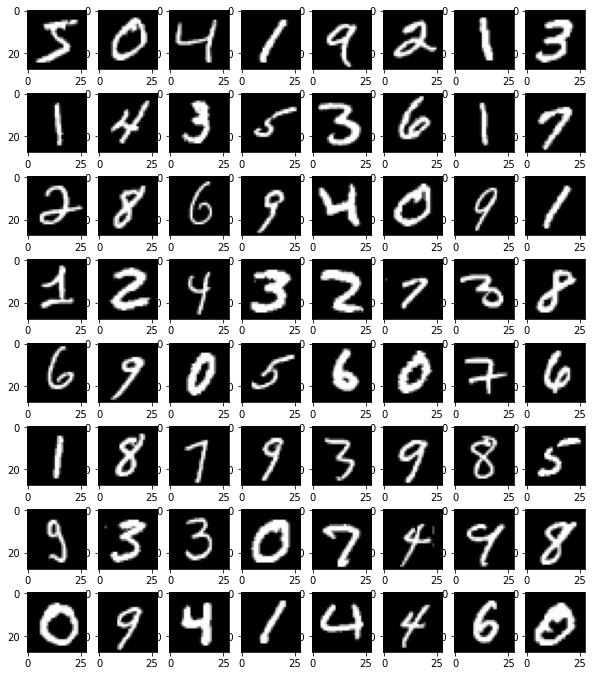

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,12))

for i,image in enumerate(x_train[:64]):

  plt.subplot(8,8,i+1)
  image = np.asarray(image).reshape(28,28)
  plt.imshow(image,cmap='gray')

plt.show()

In [0]:
input_size = 784
hidden_size = 128
code_size = 64
code_size_1 = 32

x_train = x_train.reshape((x_train.shape[0],784))

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
code = Dense(code_size_1, activation='relu')(code)

hidden_2 = Dense(code_size, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy"])

autoencoder.summary()

history = autoencoder.fit(x_train, x_train, epochs=10)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_73 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_74 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_75 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_76 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_77 (Dense)             (None, 784)               1011

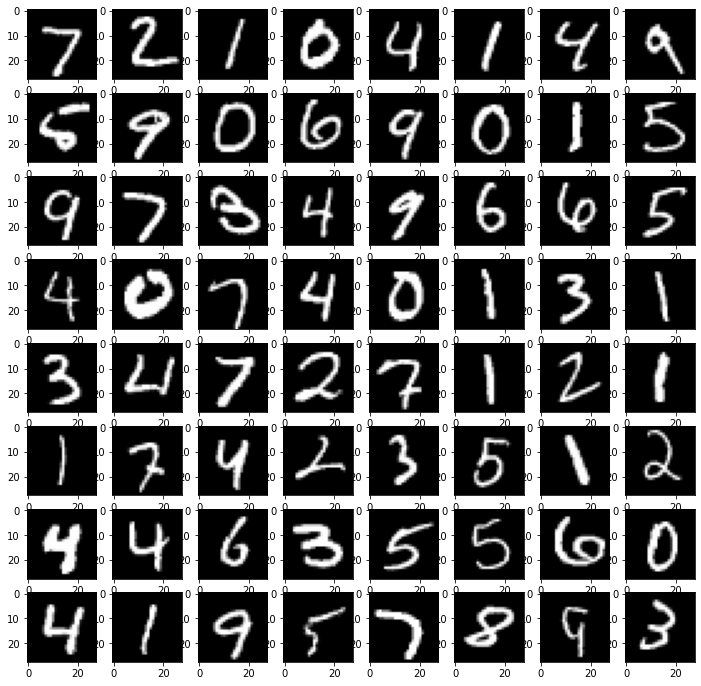

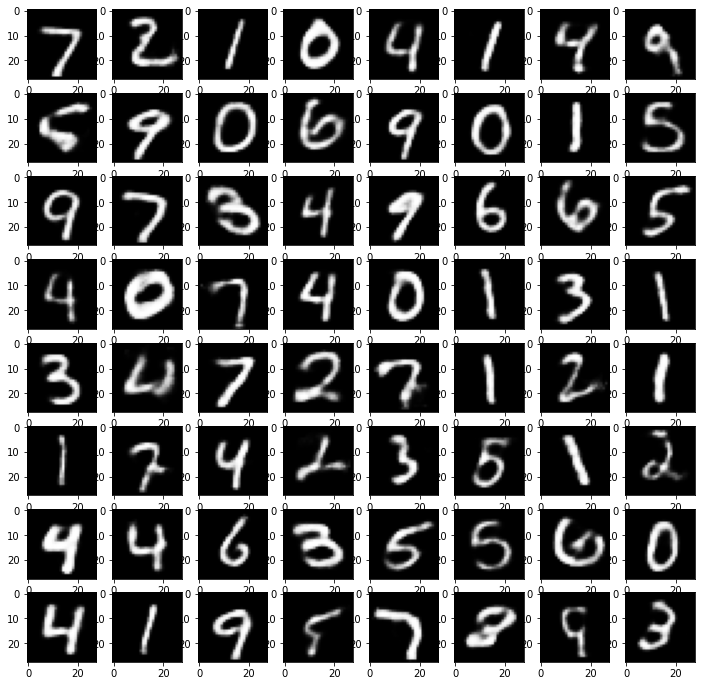

In [0]:
fig = plt.figure(figsize=(12,12))
imgs = x_test[:64]

for i,image in enumerate(imgs):

    plt.subplot(8,8,i+1)
    image = (np.asarray(image).reshape(28,28) * 0.5) + 0.5  # unflattening and rescaling
    plt.imshow(image, cmap = 'gray')

plt.show()

fig = plt.figure(figsize=(12,12))
imgs = imgs.reshape((imgs.shape[0],784))
x = autoencoder.predict(imgs)
for i,image in enumerate(x):
    plt.subplot(8,8,i+1)
    image = (np.asarray(image).reshape(28,28) * 0.5) + 0.5  # unflattening and rescaling
    plt.imshow(image, cmap = 'gray')

plt.show()